In [11]:
df = pd.read_csv('nba_logreg2.csv', sep=';')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1329 entries, 0 to 1328
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         1329 non-null   object 
 1   GP           1329 non-null   int64  
 2   MIN          1329 non-null   float64
 3   PTS          1329 non-null   float64
 4   FGM          1329 non-null   float64
 5   FGA          1329 non-null   float64
 6   FG%          1329 non-null   float64
 7   3P Made      1329 non-null   float64
 8   3PA          1329 non-null   float64
 9   3P%          1329 non-null   float64
 10  FTM          1329 non-null   float64
 11  FTA          1329 non-null   float64
 12  FT%          1329 non-null   float64
 13  OREB         1329 non-null   float64
 14  DREB         1329 non-null   float64
 15  REB          1329 non-null   float64
 16  AST          1329 non-null   float64
 17  STL          1329 non-null   float64
 18  BLK          1329 non-null   float64
 19  TOV   

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GP,1329.0,60.402558,17.481092,11.0,47.0,63.0,77.0,82.0
MIN,1329.0,17.647931,8.327441,3.1,10.8,16.1,22.9,40.9
PTS,1329.0,6.820166,4.365671,0.7,3.7,5.6,8.8,28.2
FGM,1329.0,2.634763,1.686850,0.3,1.4,2.1,3.4,10.2
FGA,1329.0,5.902483,3.598820,0.8,3.3,4.8,7.5,19.8
FG%,1329.0,44.117532,6.119492,23.8,40.2,43.9,47.8,73.7
3P Made,1329.0,0.249661,0.384608,0.0,0.0,0.1,0.4,2.3
3PA,1329.0,0.785628,1.063856,0.0,0.0,0.3,1.2,6.5
3P%,1329.0,19.308126,16.022916,0.0,0.0,22.4,32.5,100.0
FTM,1329.0,1.302784,0.989341,0.0,0.6,1.0,1.7,7.7


In [ ]:
#El 25% o menos de los partidos se jugaron 10.8 min

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('nba_logreg2.csv', sep=';')

# Seleccionar las características para aplicar PCA
features = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3P Made', '3PA', '3P%', 'FTM', 'FTA', 
            'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV']

X = df[features]

In [3]:
#Escalamiento de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Inicializar PCA
pca = PCA()
pca.fit(X_scaled)

# Varianza explicada por cada componente y acumulada
variance_explained = pca.explained_variance_ratio_
cumulative_variance_explained = np.cumsum(variance_explained)

# Crear tabla usando pandas
components = range(1, len(variance_explained) + 1)
df_variance = pd.DataFrame({
    'Componente': components,
    'Varianza Explicada': variance_explained,
    'Varianza Acumulada': cumulative_variance_explained
})

# Mostrar la tabla
print(df_variance)

    Componente  Varianza Explicada  Varianza Acumulada
0            1            0.501811            0.501811
1            2            0.205040            0.706851
2            3            0.064647            0.771498
3            4            0.045985            0.817483
4            5            0.039124            0.856607
5            6            0.031199            0.887806
6            7            0.026415            0.914221
7            8            0.023527            0.937748
8            9            0.020940            0.958687
9           10            0.013718            0.972405
10          11            0.012231            0.984636
11          12            0.005794            0.990430
12          13            0.005265            0.995695
13          14            0.002855            0.998550
14          15            0.000773            0.999323
15          16            0.000404            0.999726
16          17            0.000245            0.999972
17        

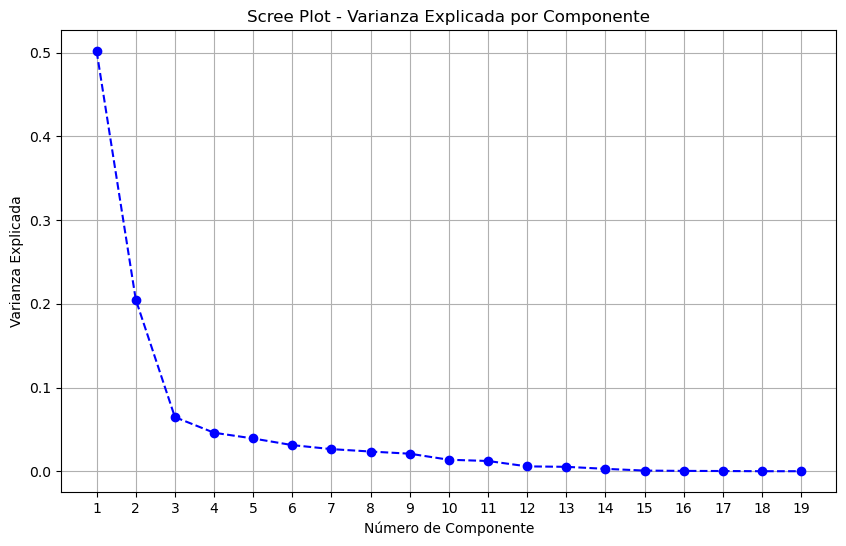

In [6]:
import matplotlib.pyplot as plt

# Varianza explicada de cada componente
componentes = range(1, len(pca.explained_variance_ratio_) + 1)
varianza_explicada = pca.explained_variance_ratio_

# Grfico de Sedimentación
plt.figure(figsize=(10, 6))
plt.plot(componentes, varianza_explicada, marker='o', linestyle='--', color='b')
plt.title('Scree Plot - Varianza Explicada por Componente')
plt.xlabel('Número de Componente')
plt.ylabel('Varianza Explicada')
plt.xticks(componentes)
plt.grid(True)
plt.show()

In [ ]:
# Vazandome en ambos criterios elegimos 2 componentes

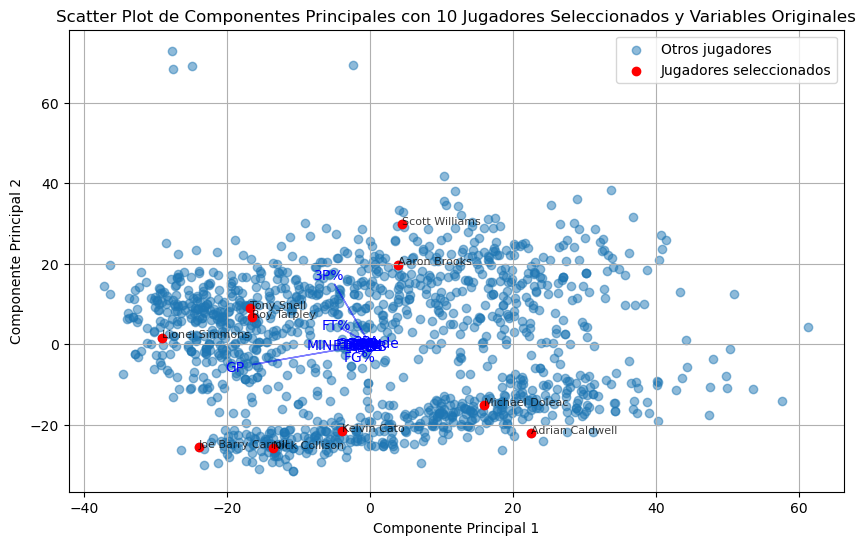

In [12]:
# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# DataFrame con los componentes principales
principal_df = pd.DataFrame(data=principal_components, columns=['Componente Principal 1', 'Componente Principal 2'])
principal_df['Name'] = df['Name']

# Selección de 10 jugadores al azar
selected_players = principal_df.sample(n=10, random_state=42)

# Scatter plot con etiquetas para los 10 jugadores seleccionados
plt.figure(figsize=(10, 6))
plt.scatter(principal_df['Componente Principal 1'], principal_df['Componente Principal 2'], alpha=0.5, label='Otros jugadores')

# Jugadores seleccionados
plt.scatter(selected_players['Componente Principal 1'], selected_players['Componente Principal 2'], color='red', label='Jugadores seleccionados')

for i, txt in enumerate(selected_players['Name']):
    plt.annotate(txt, (selected_players['Componente Principal 1'].iloc[i], selected_players['Componente Principal 2'].iloc[i]), fontsize=8, alpha=0.75)

# Variables
for i, feature in enumerate(features):
    plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='blue', alpha=0.5)
    plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, feature, color='blue', ha='center', va='center')

plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Scatter Plot de Componentes Principales con 10 Jugadores Seleccionados y Variables Originales')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Distribución General: La mayoría de los jugadores se agrupan cerca del centro del gráfico, indicando que sus estadísticas son similares en las dos dimensiones principales. Algunos jugadores están dispersos más lejos del centro, sugiriendo que tienen estadísticas más distintas.

# Jugadores Seleccionados:Los jugadores seleccionados cubren diferentes áreas del gráfico, lo que indica una variedad de perfiles estadísticos. Jugadores como Lionel Simmons y Joe Barry Carroll están más alejados, lo que puede indicar que tienen características estadísticas únicas en comparación con otros.

# Se puede decir que joe Barry tienes muchos juegos jugados (GP) y varios tiros de campo (FG%)

# Tambien se puede observar que Tony Shell y Roy Tarpley hicieron varios triples (3P%) y varios tiros libres (FT%)

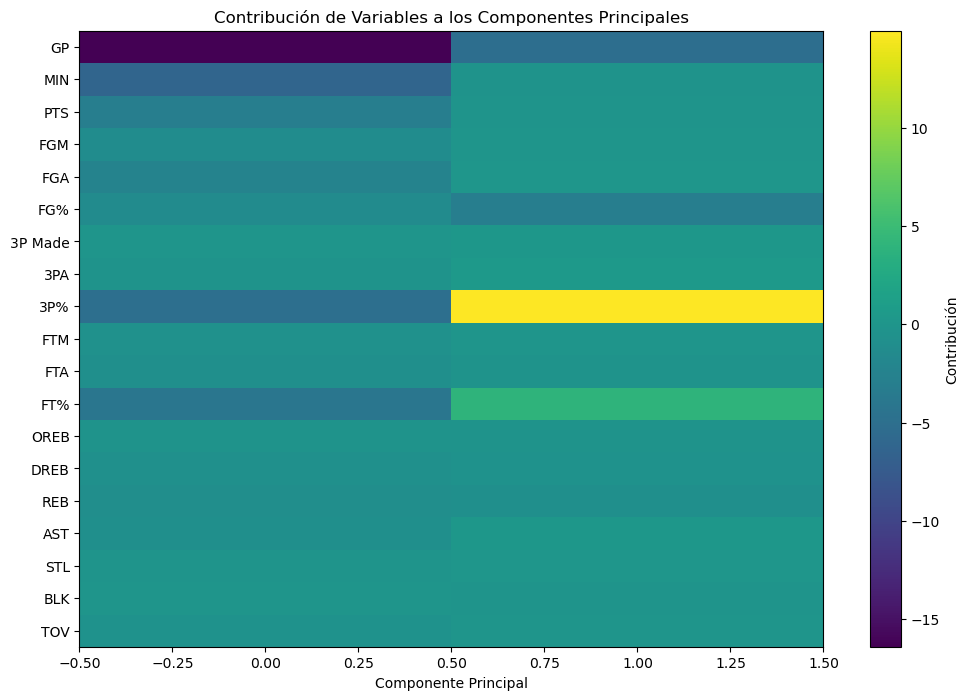

In [9]:
import numpy as np

# Matriz de componentes (loadings)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Grafico de la contribución de variables a los dos primeros componentes
plt.figure(figsize=(12, 8))
plt.imshow(loadings[:, :2], cmap='viridis', aspect='auto')
plt.yticks(range(len(features)), features)
plt.colorbar(label='Contribución')
plt.xlabel('Componente Principal')
plt.title('Contribución de Variables a los Componentes Principales')
plt.show()

In [ ]:
# Variables como "MIN" (Minutos), "PTS" (Puntos), "FTA" (Intentos de tiros libres), y "FT%" (Porcentaje de tiros libres) tienen una alta contribución al primer componente principal, lo cual se muestra en colores más claros.
# Variables como "FG%" (Porcentaje de tiros de campo), "AST" (Asistencias), y "DREB" (Rebotes defensivos) tienen una contribución más baja al primer componente principal, lo cual se muestra en colores más oscuros.

In [ ]:
from gettext import install


pip install lazypredict scikit-learn pandas

In [ ]:
pip install numpy<2

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

In [4]:
df = pd.read_csv('nba_logreg2.csv', sep=';')

In [5]:
df = df.drop(columns=['Name'])

# Características (X) y la etiqueta (y)
X = df.drop(columns=['TARGET_5Yrs'])
y = df['TARGET_5Yrs']


In [7]:
from sklearn.model_selection import train_test_split

# Entrenamiento y prueba (70% entrenamiento, 30% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [ ]:
from lazypredict.Supervised import LazyClassifier

# LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Ajuste modelos
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

models

In [6]:
df = pd.read_csv('nba_logreg2.csv', sep=';')
df = df.drop(columns=['Name'])

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# (X) e (y)
X = df.drop(columns=['TARGET_5Yrs'])
y = df['TARGET_5Yrs']

# Conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo RandomForestClassifier
rf = RandomForestClassifier()

# Parámetros para la búsqueda grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# GridSearchCV con el modelo y los parámetros
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Búsqueda grid para encontrar los mejores parámetros
grid_search.fit(X_train, y_train)

# Mejores parámetros encontrados
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Modelo con los mejores parámetros
best_rf = RandomForestClassifier(**best_params)
best_rf.fit(X_train, y_train)

# Predicción en el conjunto de prueba
y_pred = best_rf.predict(X_test)

# Evaluaacióm del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))
